In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv

import warnings
warnings.filterwarnings("ignore")

In [6]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'

input_df = read_csv(url, header = None)

In [8]:
data = input_df.values

In [35]:
X = data[0:35, 12]
y = data[0:35, 13]

<Axes: >

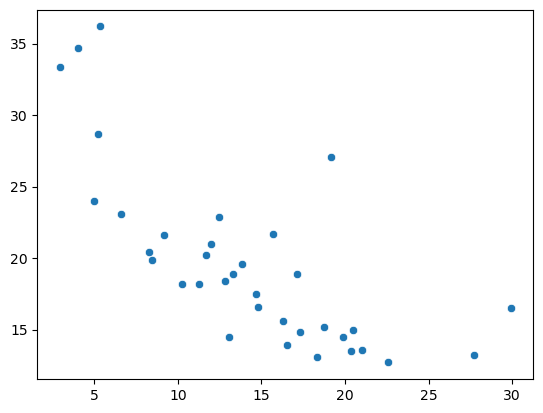

In [16]:
sns.scatterplot(x = X,y = y)

In [30]:
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.metrics import root_mean_squared_error ,mean_squared_error, r2_score

In [36]:
# 머신러닝을 위해 2차원으로 변환 (1차원 array -> 2차원 변환)

X = X[:,np.newaxis]
y = y[:,np.newaxis]

In [29]:
lr = LinearRegression()

In [37]:
lr.fit(X, y)

LinearRegression()

In [42]:
pred = lr.predict(X)

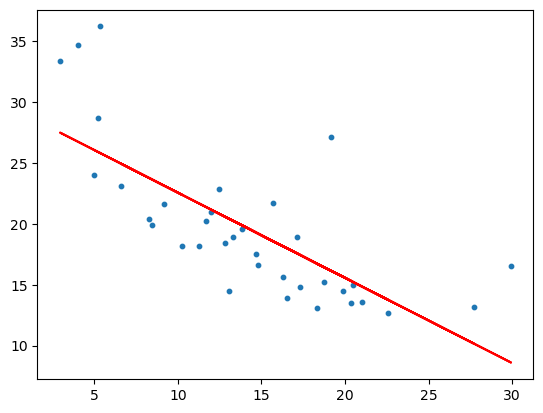

In [51]:
plt.scatter(X,y , s = 10)
plt.plot(X , pred , color = 'red')
plt.show()

In [54]:
mean_squared_error(y,pred)

16.89128629532122

In [55]:
root_mean_squared_error(y,pred) # np.sqrt(mean_squared_error(pred,y))

4.109901007971022

In [56]:
r2_score(y,pred)

0.5397260819538162

In [68]:
#다항식 만들기 (변수가 1개라서 예측력이 떨어짐 -> feature 수를 늘려서 예측력을 높이는 방법)
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree = 10)

In [71]:
X_poly = polynomial_features.fit_transform(X)

In [75]:
lr.fit(X_poly, y)

LinearRegression()

In [82]:
pred_poly = lr.predict(X_poly)

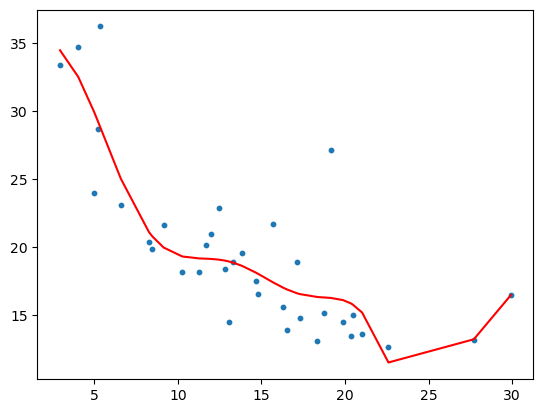

In [104]:
import operator
plt.scatter(X,y , s = 10)

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X, pred_poly), key=sort_axis)
X_re_sort, pred_poly = zip(*sorted_zip)

plt.plot(X_re_sort , pred_poly , color = 'red')
plt.show()

In [84]:
root_mean_squared_error(y,pred_poly)

3.0580734064870474

In [85]:
r2_score(y,pred_poly)

0.7451706450041322

In [114]:
#Ridge 모델 

ridge = Ridge(alpha = 1.0)
ridge.fit(X_poly, y)
pred_ridge = ridge.predict(X_poly)

In [119]:
pred_ridge

(np.float64(34.427604840107264),
 np.float64(32.55029270999992),
 np.float64(29.947789948093504),
 np.float64(29.239344233207113),
 np.float64(28.863557770095113),
 np.float64(24.988695802026072),
 np.float64(21.101292824645725),
 np.float64(20.777852438851824),
 np.float64(19.987811597940095),
 np.float64(19.350018403153626),
 np.float64(19.203431002503294),
 np.float64(19.178805065417237),
 np.float64(19.15616447165621),
 np.float64(19.09781397400002),
 np.float64(19.019086013909146),
 np.float64(18.950233231856146),
 np.float64(18.870245681326196),
 np.float64(18.618416281378813),
 np.float64(18.11344188080784),
 np.float64(18.019214451390326),
 np.float64(17.400276406019657),
 np.float64(17.030635572386927),
 np.float64(16.914718021037515),
 np.float64(16.646802437316182),
 np.float64(16.583489867202843),
 np.float64(16.36887411029511),
 np.float64(16.335326490864645),
 np.float64(16.29203685592711),
 np.float64(16.11744673224075),
 np.float64(15.870089673683651),
 np.float64(15.78

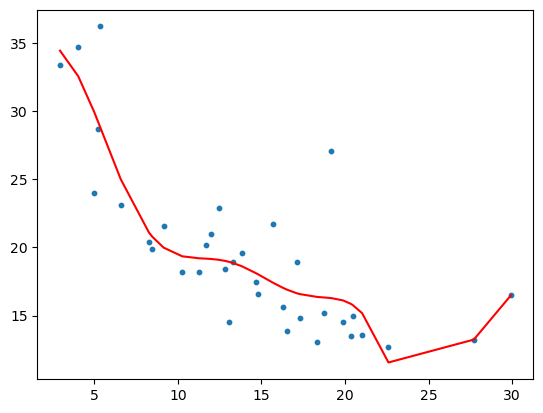

In [118]:
plt.scatter(X,y , s = 10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X, pred_ridge), key=sort_axis)
X_re_sort, pred_ridge = zip(*sorted_zip)

plt.plot(X_re_sort , pred_ridge , color = 'red')
plt.show()

In [115]:
root_mean_squared_error(y,pred_ridge)

3.055183665518603

In [116]:
r2_score(y,pred_ridge)

0.7456520218720193

In [120]:
#Lasso

lasso = Lasso(alpha = 1.0)
lasso.fit(X_poly, y)
pred_lasso = lasso.predict(X_poly)

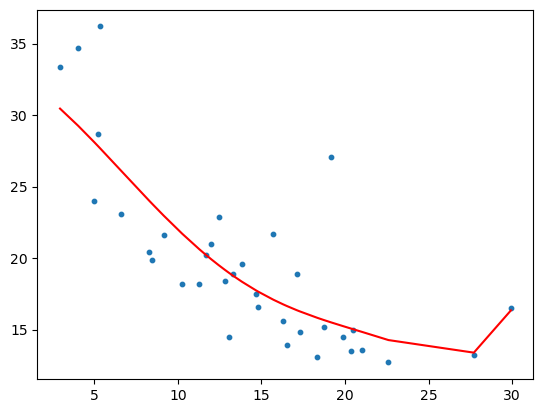

In [122]:
plt.scatter(X,y , s = 10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X, pred_lasso), key=sort_axis)
X_re_sort, pred_lasso = zip(*sorted_zip)

plt.plot(X_re_sort , pred_lasso , color = 'red')
plt.show()

In [123]:
root_mean_squared_error(y,pred_ridge)

3.9054637444397184

In [124]:
r2_score(y,pred_ridge)

0.5843776785414263